In [3]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import re

In [8]:
file_loc = './otu_table_L2.txt'
with open(file_loc, 'r') as file:
    newfile = re.sub('D_0__', 'K:', file.read())
    newfile = re.sub('D_1__', 'P:', newfile)
    newfile = re.sub('D_2__', 'C:', newfile)
    newfile = re.sub('D_3__', 'O:', newfile)
    with open('./renamed_'+file_loc[-6:], 'w') as output:
        output.write(newfile)

In [9]:
df = pd.read_csv('./renamed_'+file_loc[-6:], header=1, index_col=0,
                 sep='\t')
cols = []
for num in range(8,38):
    cols.append('515rcbc' + str(num))
df = df[cols]
df = df*100
df['total'] = df.sum(axis=1)
df['total_perc'] = df[['total']]*100/df[['total']].sum()
df

,515rcbc8,515rcbc9,515rcbc10,515rcbc11,515rcbc12,515rcbc13,515rcbc14,515rcbc15,515rcbc16,515rcbc17,...,515rcbc30,515rcbc31,515rcbc32,515rcbc33,515rcbc34,515rcbc35,515rcbc36,515rcbc37,total,total_perc
#OTU ID,,,,,,,,,,,,,,,,,,,,,
K:Archaea;P:Crenarchaeota,0.000000,0.000000,0.000000,0.001017,0.000067,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000737,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001822,0.000061
K:Archaea;P:Diapherotrites,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.005162,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007088,0.000236
K:Archaea;P:Euryarchaeota,0.000000,0.009038,0.001095,0.000000,0.004504,0.000000,0.000801,0.003739,0.000000,0.013859,...,0.080386,0.000000,0.000000,0.000000,0.000000,0.005663,0.000000,0.000000,0.150935,0.005031
K:Archaea;P:Nanoarchaeaeota,0.002374,0.000000,0.000000,0.003052,0.000000,0.001675,0.003205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.003242,0.003809,0.006400,0.000000,0.000000,0.007995,0.056543,0.001885
K:Archaea;P:Thaumarchaeota,1.281777,4.956013,1.550451,1.132156,0.161616,2.201189,2.760952,2.560387,3.004111,3.571099,...,6.414691,0.884776,0.700329,1.769355,4.207798,3.247106,0.494171,2.136369,78.900811,2.630027
K:Bacteria;P:Acidobacteria,23.494505,18.132381,18.946372,14.831957,17.272232,22.923193,14.613979,18.178844,16.029816,16.018664,...,17.258011,17.652571,21.613998,13.853919,19.192679,25.830747,4.857073,16.139504,551.204921,18.373497
K:Bacteria;P:Actinobacteria,10.408507,13.747289,13.245330,11.939008,6.165327,8.868414,12.904208,26.239530,12.690247,22.091841,...,13.782957,9.217914,9.446870,15.847062,17.279171,10.283824,17.907555,14.473263,406.063694,13.535456
K:Bacteria;P:AncK6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.001905,0.000000,0.000000,0.000000,0.000000,0.003830,0.000128
K:Bacteria;P:Armatimonadetes,0.192267,0.078332,0.020249,0.079342,0.047530,0.073708,0.073711,0.122457,0.076214,0.071145,...,0.181423,0.082777,0.189132,0.048567,0.091196,0.195936,0.062795,0.102341,2.795605,0.093187


In [15]:
def plot_heatmap(dataframe, title=False, savename=False, dpi=100):
    matplotlib.rcParams.update({'font.size': 25})
    grid_kws = {"height_ratios": (.9, .05), "hspace": .3}
    fig, ax = plt.subplots(figsize=(20,20))
    sns.heatmap(ax=ax, 
                data=dataframe, 
               yticklabels=True, cbar=False,)
    for label in ax.get_yticklabels():
        label.set_size(14)
    if title:
        plt.title(title, fontsize=40)
    plt.ylabel('Phylum')
    plt.xlabel('Sample')
    if savename:
        plt.savefig(savename, bbox_inches='tight',dpi=dpi)
    plt.show()


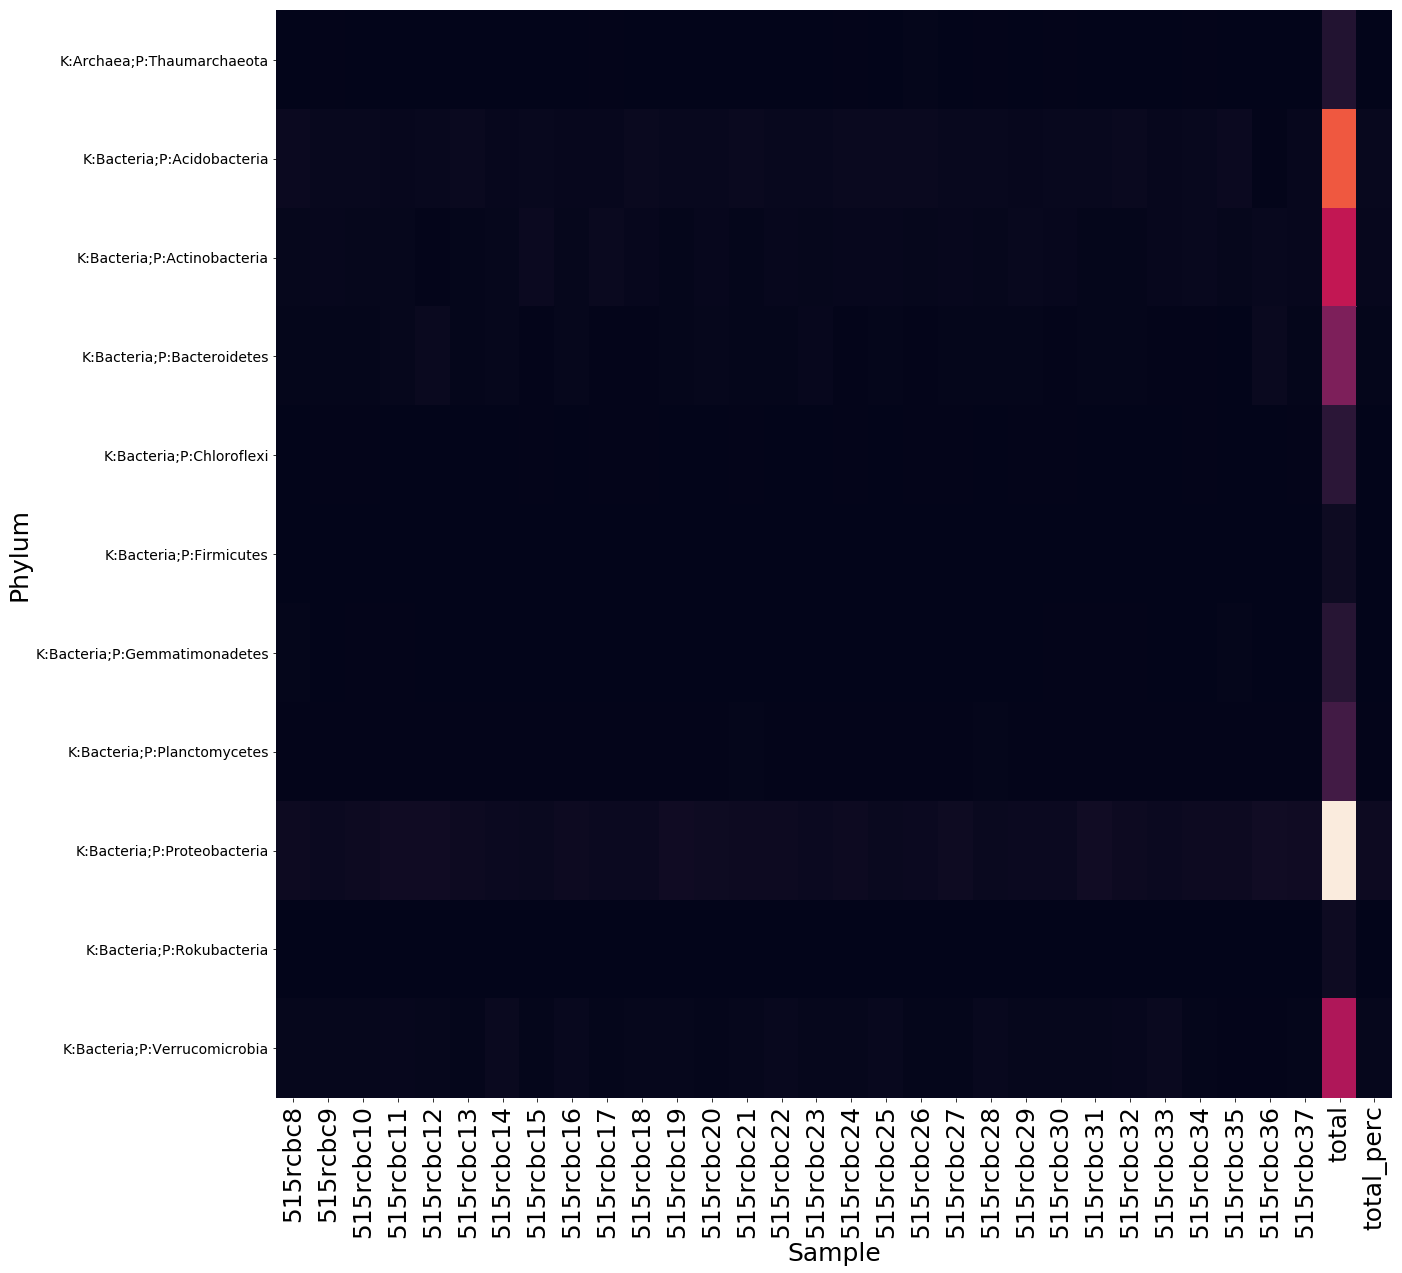

In [16]:
plot_heatmap(df[df.sum(axis=1)>50], savename='./L2_plot.png', dpi=200)

In [12]:
top = df[['total_perc']].sum(axis=1).sort_values(ascending=False)[:10]

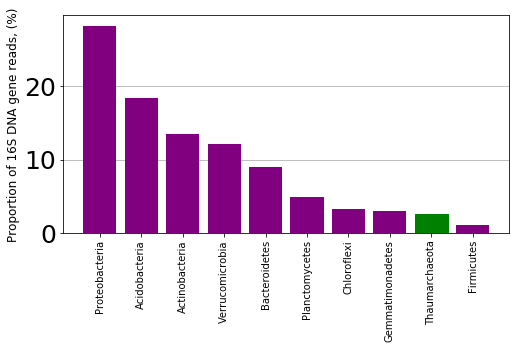

96.15649639907794


In [14]:
def plot_bar(ser):
    fig, ax = plt.subplots(figsize=(8,4))
    val = ser.values
    xlabels = []
    for phyl in ser.index.tolist():
        xlabels.append(phyl.split(';P:')[1])
    bars = ax.bar(xlabels,val, color='purple')
    bars[8].set_color('green')
    ax.set_xticklabels(xlabels)
    plt.ylabel('Proportion of 16S DNA gene reads, (%)', fontsize=12)
    plt.xticks(rotation=90, fontsize=10)
    ax.set_axisbelow(True)
    plt.grid(axis='y')
    plt.savefig('./top_10.png', dpi=300, bbox_inches='tight')
    plt.show()
    print(val.sum())
plot_bar(top)